In [11]:
# Cellule 1 : Importer les bibliothèques nécessaires

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("Bibliothèques importées avec succès!")

Bibliothèques importées avec succès!


## Liste des algorithmes permettant d'implémenter les différentes méthodes d'ordonnancement

In [ ]:
# Cellule 2 

# FCFS

"""
T_PROCESSUS = STRUCTURE
   nom      : CHAINE
   arrivee  : ENTIER
   duree    : ENTIER
   debut    : ENTIER
   fin      : ENTIER
   sejour   : ENTIER
   attente  : ENTIER
   reponse  : ENTIER
FINSTRUCTURE

T_TABPROC = TABLEAU[1..100] DE T_PROCESSUS

"""


"""
ALGORITHME FCFS_Tableau_Structures

CONSTANTES
   MAX : ENTIER ← 100

VARIABLES
   proc        : T_TABPROC
   n           : ENTIER
   i, j, k     : ENTIER
   tempsCourant: ENTIER
   minIndex    : ENTIER
   tmp         : T_PROCESSUS

DEBUT

   { 1. Lecture du nombre de processus }
   ECRIRE("Donner le nombre de processus (<= ", MAX, ") :")
   LIRE(n)

   { 2. Lecture des caractéristiques de chaque processus }
   POUR i DE 1 A n FAIRE

      ECRIRE("Nom du processus ", i, " :")
      LIRE(proc[i].nom)

      ECRIRE("Temps d'arrivee de ", proc[i].nom, " :")
      LIRE(proc[i].arrivee)

      ECRIRE("Temps d'execution (duree) de ", proc[i].nom, " :")
      LIRE(proc[i].duree)

      proc[i].debut   ← 0
      proc[i].fin     ← 0
      proc[i].sejour  ← 0
      proc[i].attente ← 0
      proc[i].reponse ← 0

   FINPOUR

   { 3. Tri des processus par ordre croissant de temps d'arrivee (tri par selection) }

   POUR k DE 1 A n-1 FAIRE

      minIndex ← k

      POUR j DE k+1 A n FAIRE
         SI proc[j].arrivee < proc[minIndex].arrivee ALORS
            minIndex ← j
         FINSI
      FINPOUR

      SI minIndex ≠ k ALORS
         tmp           ← proc[k]
         proc[k]       ← proc[minIndex]
         proc[minIndex]← tmp
      FINSI

   FINPOUR

   { 4. Calcul des temps d'execution selon FCFS }

   tempsCourant ← 0

   POUR i DE 1 A n FAIRE

      { Si le processeur est libre avant l'arrivée du processus, on avance le temps }
      SI tempsCourant < proc[i].arrivee ALORS
         tempsCourant ← proc[i].arrivee
      FINSI

      proc[i].debut   ← tempsCourant
      proc[i].fin     ← proc[i].debut + proc[i].duree

      proc[i].sejour  ← proc[i].fin   - proc[i].arrivee
      proc[i].attente ← proc[i].debut - proc[i].arrivee
      proc[i].reponse ← proc[i].debut - proc[i].arrivee   { FCFS non preemptif }

      tempsCourant    ← proc[i].fin

   FINPOUR

   { 5. Affichage des resultats }

   ECRIRE("Resultats de l'ordonnancement FCFS :")
   POUR i DE 1 A n FAIRE

      ECRIRE("Processus : ", proc[i].nom)
      ECRIRE("  Temps d'arrivee    : ", proc[i].arrivee)
      ECRIRE("  Duree (execution)  : ", proc[i].duree)
      ECRIRE("  Debut execution    : ", proc[i].debut)
      ECRIRE("  Fin execution      : ", proc[i].fin)
      ECRIRE("  Temps de sejour    : ", proc[i].sejour)
      ECRIRE("  Temps d'attente    : ", proc[i].attente)
      ECRIRE("  Temps de reponse   : ", proc[i].reponse)

   FINPOUR

FIN

"""

In [ ]:
#  Cellule 3.

# Round Robin
"""
T_PROCESSUS = STRUCTURE
   nom      : CHAINE
   arrivee  : ENTIER
   duree    : ENTIER
   reste    : ENTIER
   debut    : ENTIER
   fin      : ENTIER
   sejour   : ENTIER
   attente  : ENTIER
   reponse  : ENTIER
   traite   : BOOLEEN
   dansFile : BOOLEEN
FINSTRUCTURE

T_TABPROC = TABLEAU[1..100] DE T_PROCESSUS

T_FILE = STRUCTURE
   tab   : TABLEAU[1..100] DE ENTIER
   tete  : ENTIER
   queue : ENTIER
   nb    : ENTIER
FINSTRUCTURE

"""


"""
ALGORITHME RoundRobin_FileFIFO

CONSTANTES
   MAX : ENTIER ← 100

VARIABLES
   proc         : T_TABPROC
   file         : T_FILE
   n            : ENTIER         { nombre de processus }
   q            : ENTIER         { quantum }
   i            : ENTIER
   tempsCourant : ENTIER
   nbTermines   : ENTIER
   prochainArr  : ENTIER
   p            : ENTIER         { indice du processus courant }
   exec         : ENTIER         { temps d'exécution pour un tour }

DEBUT

   { 1. Lecture des données }

   ECRIRE("Donner le nombre de processus (<= ", MAX, ") :")
   LIRE(n)

   ECRIRE("Donner la valeur du quantum :")
   LIRE(q)

   POUR i DE 1 A n FAIRE

      ECRIRE("Nom du processus ", i, " :")
      LIRE(proc[i].nom)

      ECRIRE("Temps d'arrivee de ", proc[i].nom, " :")
      LIRE(proc[i].arrivee)

      ECRIRE("Temps d'execution (duree) de ", proc[i].nom, " :")
      LIRE(proc[i].duree)

      proc[i].reste    ← proc[i].duree
      proc[i].debut    ← -1
      proc[i].fin      ← 0
      proc[i].sejour   ← 0
      proc[i].attente  ← 0
      proc[i].reponse  ← 0
      proc[i].traite   ← FAUX
      proc[i].dansFile ← FAUX

   FINPOUR

   { 2. Initialisation de la file }

   file.nb    ← 0
   file.tete  ← 1
   file.queue ← 0

   { 3. Initialisation du temps et du compteur }

   tempsCourant ← 0
   nbTermines   ← 0

   { 4. Fonctionnalité interne : ajouter les nouveaux processus prêts dans la file
        (arrives et non termines, et pas encore dans la file) }

   { On va coder ça "inline" : une boucle qu'on réutilise partout }

   { 4.1 Première insertion : processus arrivés au temps 0 }

   POUR i DE 1 A n FAIRE
      SI (proc[i].traite = FAUX) ET (proc[i].dansFile = FAUX) ET (proc[i].arrivee <= tempsCourant) ALORS

         { ENFILER i }
         SI file.nb < MAX ALORS
            file.queue ← file.queue + 1
            SI file.queue > MAX ALORS
               file.queue ← 1
            FINSI
            file.tab[file.queue] ← i
            file.nb ← file.nb + 1
            proc[i].dansFile ← VRAI
         FINSI

      FINSI
   FINPOUR

   { 5. Boucle principale Round Robin }

   TANTQUE nbTermines < n FAIRE

      { 5.1 Si la file est vide, avancer le temps au prochain arrivee }

      SI file.nb = 0 ALORS

         prochainArr ← -1

         POUR i DE 1 A n FAIRE
            SI proc[i].traite = FAUX ALORS
               SI (prochainArr = -1) OU (proc[i].arrivee < prochainArr) ALORS
                  prochainArr ← proc[i].arrivee
               FINSI
            FINSI
         FINPOUR

         tempsCourant ← prochainArr

         { Ajouter les processus arrives à ce moment }

         POUR i DE 1 A n FAIRE
            SI (proc[i].traite = FAUX) ET (proc[i].dansFile = FAUX) ET (proc[i].arrivee <= tempsCourant) ALORS

               { ENFILER i }
               SI file.nb < MAX ALORS
                  file.queue ← file.queue + 1
                  SI file.queue > MAX ALORS
                     file.queue ← 1
                  FINSI
                  file.tab[file.queue] ← i
                  file.nb ← file.nb + 1
                  proc[i].dansFile ← VRAI
               FINSI

            FINSI
         FINPOUR

      SINON   { file.nb > 0 }

         { 5.2 DEFILER le processus en tête de file }

         p ← file.tab[file.tete]
         file.tete ← file.tete + 1
         SI file.tete > MAX ALORS
            file.tete ← 1
         FINSI
         file.nb ← file.nb - 1
         proc[p].dansFile ← FAUX

         { 5.3 Si c'est la première fois qu'il passe au processeur, fixer son debut }

         SI proc[p].debut = -1 ALORS
            proc[p].debut ← tempsCourant
         FINSI

         { 5.4 Déterminer le temps d'exécution pour ce tour }

         exec ← q
         SI proc[p].reste < exec ALORS
            exec ← proc[p].reste
         FINSI

         { 5.5 Exécution pendant 'exec' unités de temps }

         tempsCourant   ← tempsCourant + exec
         proc[p].reste  ← proc[p].reste - exec

         { 5.6 Ajouter les nouveaux processus arrives pendant ce temps }

         POUR i DE 1 A n FAIRE
            SI (proc[i].traite = FAUX) ET (proc[i].dansFile = FAUX) ET (proc[i].arrivee <= tempsCourant) ALORS

               { ENFILER i }
               SI file.nb < MAX ALORS
                  file.queue ← file.queue + 1
                  SI file.queue > MAX ALORS
                     file.queue ← 1
                  FINSI
                  file.tab[file.queue] ← i
                  file.nb ← file.nb + 1
                  proc[i].dansFile ← VRAI
               FINSI

            FINSI
         FINPOUR

         { 5.7 Vérifier si le processus p est terminé }

         SI proc[p].reste = 0 ALORS

            proc[p].fin     ← tempsCourant
            proc[p].sejour  ← proc[p].fin - proc[p].arrivee
            proc[p].reponse ← proc[p].debut - proc[p].arrivee
            proc[p].attente ← proc[p].sejour - proc[p].duree

            proc[p].traite  ← VRAI
            nbTermines      ← nbTermines + 1

         SINON

            { Le processus n'est pas terminé : on le remet en fin de file }

            SI file.nb < MAX ALORS
               file.queue ← file.queue + 1
               SI file.queue > MAX ALORS
                  file.queue ← 1
               FINSI
               file.tab[file.queue] ← p
               file.nb ← file.nb + 1
               proc[p].dansFile ← VRAI
            FINSI

         FINSI

      FINSI

   FINTANTQUE

   { 6. Affichage des résultats }

   ECRIRE("Resultats de l'ordonnancement Round Robin :")
   POUR i DE 1 A n FAIRE

      ECRIRE("Processus : ", proc[i].nom)
      ECRIRE("  Temps d'arrivee    : ", proc[i].arrivee)
      ECRIRE("  Duree (execution)  : ", proc[i].duree)
      ECRIRE("  Debut execution    : ", proc[i].debut)
      ECRIRE("  Fin execution      : ", proc[i].fin)
      ECRIRE("  Temps de sejour    : ", proc[i].sejour)
      ECRIRE("  Temps d'attente    : ", proc[i].attente)
      ECRIRE("  Temps de reponse   : ", proc[i].reponse)

   FINPOUR

FIN

"""

In [ ]:
# Shortest Job First

# Cellule 4
"""
T_PROCESSUS = STRUCTURE
   nom      : CHAINE             { nom du processus }
   arrivee  : ENTIER             { temps d'arrivée }
   duree    : ENTIER             { temps d'exécution }
   debut    : ENTIER             { instant de début d'exécution }
   fin      : ENTIER             { instant de fin d'exécution }
   sejour   : ENTIER             { temps de séjour }
   attente  : ENTIER             { temps d'attente }
   reponse  : ENTIER             { temps de réponse }
   traite   : BOOLEEN            { VRAI si le processus est déjà planifié }
FINSTRUCTURE

T_TABPROC = TABLEAU[1..100] DE T_PROCESSUS

ALGORITHME SJF_Tableau_Structures

CONSTANTES
   MAX : ENTIER ← 100

VARIABLES
   proc          : T_TABPROC
   n             : ENTIER            { nombre de processus }
   i, k          : ENTIER            { variables de boucle }
   tempsCourant  : ENTIER
   minIndex      : ENTIER            { indice du processus choisi }
   prochainArr   : ENTIER            { plus petit temps d'arrivée parmi les non traités }
   p             : ENTIER            { indice temporaire }

DEBUT

   ECRIRE("Donner le nombre de processus (<= ", MAX, ") :")
   LIRE(n)

   { 1. Saisie des données d'entrée }
   POUR i DE 1 A n FAIRE

      ECRIRE("Nom du processus ", i, " :")
      LIRE(proc[i].nom)

      ECRIRE("Temps d'arrivee de ", proc[i].nom, " :")
      LIRE(proc[i].arrivee)

      ECRIRE("Temps d'execution de ", proc[i].nom, " :")
      LIRE(proc[i].duree)

      { Initialisation des champs calculés }
      proc[i].debut   ← 0
      proc[i].fin     ← 0
      proc[i].sejour  ← 0
      proc[i].attente ← 0
      proc[i].reponse ← 0
      proc[i].traite  ← FAUX

   FINPOUR

   { 2. Initialisation de l'horloge }
   tempsCourant ← 0

   { 3. Planification SJF non préemptive }
   POUR k DE 1 A n FAIRE

      { 3.1 Chercher, parmi les processus non traités, celui
           qui est déjà arrivé (arrivee <= tempsCourant)
           et qui a la plus petite duree }

      minIndex ← -1

      POUR i DE 1 A n FAIRE
         SI (proc[i].traite = FAUX) ET (proc[i].arrivee <= tempsCourant) ALORS

            SI (minIndex = -1) OU (proc[i].duree < proc[minIndex].duree) ALORS
               minIndex ← i
            FINSI

         FINSI
      FINPOUR

      { 3.2 Si aucun processus n'est encore arrivé, avancer l'horloge
             jusqu'au prochain temps d'arrivée }

      SI minIndex = -1 ALORS

         prochainArr ← -1

         POUR i DE 1 A n FAIRE
            SI proc[i].traite = FAUX ALORS

               SI (prochainArr = -1) OU (proc[i].arrivee < prochainArr) ALORS
                  prochainArr ← proc[i].arrivee
               FINSI

            FINSI
         FINPOUR

         tempsCourant ← prochainArr

         { Rechercher à nouveau le plus court job désormais arrivé }

         minIndex ← -1

         POUR i DE 1 A n FAIRE
            SI (proc[i].traite = FAUX) ET (proc[i].arrivee <= tempsCourant) ALORS

               SI (minIndex = -1) OU (proc[i].duree < proc[minIndex].duree) ALORS
                  minIndex ← i
               FINSI

            FINSI
         FINPOUR

      FINSI

      { 3.3 A ce stade, minIndex désigne le prochain processus à exécuter }

      p ← minIndex

      proc[p].debut  ← tempsCourant
      proc[p].fin    ← tempsCourant + proc[p].duree

      proc[p].sejour ← proc[p].fin  - proc[p].arrivee
      proc[p].attente← proc[p].debut - proc[p].arrivee
      proc[p].reponse← proc[p].debut - proc[p].arrivee   { SJF non préemptif }

      proc[p].traite ← VRAI

      tempsCourant   ← proc[p].fin

   FINPOUR

   { 4. Affichage des résultats pour chaque processus }

   ECRIRE("Resultats SJF :")
   POUR i DE 1 A n FAIRE
      ECRIRE("Processus : ", proc[i].nom)
      ECRIRE("  Debut execution  : ", proc[i].debut)
      ECRIRE("  Fin execution    : ", proc[i].fin)
      ECRIRE("  Temps de sejour  : ", proc[i].sejour)
      ECRIRE("  Temps d'attente  : ", proc[i].attente)
      ECRIRE("  Temps de reponse : ", proc[i].reponse)
   FINPOUR

FIN

"""

In [ ]:
# SRT

# Cellule 5
"""
T_PROCESSUS = STRUCTURE
   nom      : CHAINE     { nom du processus, ex : "P1" }
   arrivee  : ENTIER     { temps d'arrivée }
   duree    : ENTIER     { durée totale d'exécution (burst time) }
   reste    : ENTIER     { temps d'exécution restant }
   debut    : ENTIER     { instant de la première mise en exécution }
   fin      : ENTIER     { instant de fin d'exécution }
   sejour   : ENTIER     { temps de séjour = fin - arrivée }
   attente  : ENTIER     { temps d'attente dans la file }
   reponse  : ENTIER     { temps de réponse = debut - arrivée }
   traite   : BOOLEEN    { VRAI si le processus est terminé }
FINSTRUCTURE

T_TABPROC = TABLEAU[1..100] DE T_PROCESSUS

"""


"""
ALGORITHME SRT_Preemptif_Structures

CONSTANTES
   MAX : ENTIER ← 100

VARIABLES
   proc         : T_TABPROC
   n            : ENTIER            { nombre de processus }
   i            : ENTIER            { variable de boucle }
   tempsCourant : ENTIER
   nbTermines   : ENTIER
   minIndex     : ENTIER            { indice du processus prêt ayant le plus petit temps restant }
   p            : ENTIER            { indice temporaire pour le processus courant }

DEBUT

   { 1. Lecture du nombre de processus }
   ECRIRE("Donner le nombre de processus (<= ", MAX, ") :")
   LIRE(n)

   { 2. Saisie des données pour chaque processus et initialisation }
   POUR i DE 1 A n FAIRE

      ECRIRE("Nom du processus ", i, " :")
      LIRE(proc[i].nom)

      ECRIRE("Temps d'arrivee de ", proc[i].nom, " :")
      LIRE(proc[i].arrivee)

      ECRIRE("Temps d'execution (duree) de ", proc[i].nom, " :")
      LIRE(proc[i].duree)

      proc[i].reste   ← proc[i].duree   { au début, tout reste à exécuter }
      proc[i].debut   ← -1              { -1 pour marquer "non encore démarré" }
      proc[i].fin     ← 0
      proc[i].sejour  ← 0
      proc[i].attente ← 0
      proc[i].reponse ← 0
      proc[i].traite  ← FAUX

   FINPOUR

   { 3. Initialisation de l'horloge et du compteur de processus terminés }

   tempsCourant ← 0
   nbTermines   ← 0

   { 4. Boucle principale : SRT (SJF préemptif) }

   TANTQUE nbTermines < n FAIRE

      { 4.1 Recherche du processus prêt ayant le plus petit temps restant }

      minIndex ← -1

      POUR i DE 1 A n FAIRE

         SI (proc[i].traite = FAUX) ET (proc[i].arrivee <= tempsCourant) ET (proc[i].reste > 0) ALORS

            SI (minIndex = -1) OU (proc[i].reste < proc[minIndex].reste) ALORS
               minIndex ← i
            FINSI

         FINSI

      FINPOUR

      { 4.2 Si aucun processus n'est prêt, avancer l'horloge }

      SI minIndex = -1 ALORS

         tempsCourant ← tempsCourant + 1

      SINON

         p ← minIndex

         { 4.3 Si le processus démarre pour la première fois, fixer son temps de début }

         SI proc[p].debut = -1 ALORS
            proc[p].debut ← tempsCourant
         FINSI

         { 4.4 Exécution du processus p pendant une unité de temps }

         tempsCourant     ← tempsCourant + 1
         proc[p].reste    ← proc[p].reste - 1

         { 4.5 Si le processus vient de se terminer }

         SI proc[p].reste = 0 ALORS

            proc[p].fin     ← tempsCourant

            proc[p].sejour  ← proc[p].fin - proc[p].arrivee
            proc[p].reponse ← proc[p].debut - proc[p].arrivee

            { En préemptif, attente = temps de séjour - durée totale d'exécution }
            proc[p].attente ← proc[p].sejour - proc[p].duree

            proc[p].traite  ← VRAI
            nbTermines      ← nbTermines + 1

         FINSI

      FINSI

   FINTANTQUE

   { 5. Affichage des résultats pour chaque processus }

   ECRIRE("Resultats de l'ordonnancement SRT (SJF preemptif) :")
   POUR i DE 1 A n FAIRE

      ECRIRE("Processus : ", proc[i].nom)
      ECRIRE("  Temps d'arrivee    : ", proc[i].arrivee)
      ECRIRE("  Duree (execution)  : ", proc[i].duree)
      ECRIRE("  Debut execution    : ", proc[i].debut)
      ECRIRE("  Fin execution      : ", proc[i].fin)
      ECRIRE("  Temps de sejour    : ", proc[i].sejour)
      ECRIRE("  Temps d'attente    : ", proc[i].attente)
      ECRIRE("  Temps de reponse   : ", proc[i].reponse)

   FINPOUR

FIN

"""

## Implémentation en python 

In [3]:
# Cellule 6 : Fonctions des 4 méthodes d'ordonnancement : First Come First Served (FCFS), Round Robin(RR), Shortest Job First(SJF)
# Shortest Remaining Time(SRT)

def fcfs_simple(processus):
    """FCFS - First Come First Served"""
    procs_tries = sorted(processus, key=lambda x: x['arrivee'])
    temps_courant = 0
    resultats = []
    gantt = []
    
    for p in procs_tries:
        debut = max(temps_courant, p['arrivee'])
        fin = debut + p['execution']
        sejour = fin - p['arrivee']
        attente = sejour - p['execution']
        reponse = debut - p['arrivee']
        
        resultats.append({
            'id': p['id'], 'arrivee': p['arrivee'], 'execution': p['execution'],
            'fin': fin, 'sejour': sejour, 'attente': attente, 'reponse': reponse
        })
        gantt.append({'id': p['id'], 'debut': debut, 'fin': fin})
        temps_courant = fin
    
    return resultats, gantt


def round_robin(processus, quantum):
    """Round Robin"""
    processus_tries = sorted(processus, key=lambda x: x['arrivee'])
    
    temps_courant = 0
    file_attente = []
    execution_restante = {p['id']: p['execution'] for p in processus_tries}
    temps_debut = {p['id']: None for p in processus_tries}
    temps_fin = {}
    gantt = []
    
    i = 0
    processus_actuel = None
    temps_dans_quantum = 0
    
    while execution_restante or file_attente or processus_actuel:
        while i < len(processus_tries) and processus_tries[i]['arrivee'] <= temps_courant:
            file_attente.append(processus_tries[i]['id'])
            i += 1
        
        if processus_actuel is None and file_attente:
            processus_actuel = file_attente.pop(0)
            temps_dans_quantum = 0
            
            if temps_debut[processus_actuel] is None:
                temps_debut[processus_actuel] = temps_courant
        
        if processus_actuel:
            if not gantt or gantt[-1]['id'] != processus_actuel:
                gantt.append({'id': processus_actuel, 'debut': temps_courant, 'duree': 1})
            else:
                gantt[-1]['duree'] += 1
            
            execution_restante[processus_actuel] -= 1
            temps_dans_quantum += 1
            temps_courant += 1
            
            if execution_restante[processus_actuel] == 0:
                temps_fin[processus_actuel] = temps_courant
                del execution_restante[processus_actuel]
                processus_actuel = None
            elif temps_dans_quantum >= quantum:
                while i < len(processus_tries) and processus_tries[i]['arrivee'] <= temps_courant:
                    file_attente.append(processus_tries[i]['id'])
                    i += 1
                
                file_attente.append(processus_actuel)
                processus_actuel = None
        else:
            temps_courant += 1
    
    resultats = []
    for proc in processus_tries:
        arrivee = proc['arrivee']
        execution = proc['execution']
        fin = temps_fin[proc['id']]
        sejour = fin - arrivee
        attente = sejour - execution
        reponse = temps_debut[proc['id']] - arrivee
        
        resultats.append({
            'id': proc['id'], 'arrivee': arrivee, 'execution': execution,
            'fin': fin, 'sejour': sejour, 'attente': attente, 'reponse': reponse
        })
    
    return resultats, gantt


def sjf_non_preemptif(processus):
    """SJF - Shortest Job First"""
    processus_tries = sorted(processus, key=lambda x: x['arrivee'])
    
    temps_courant = 0
    resultats = []
    processus_restants = processus_tries.copy()
    gantt = []
    
    while processus_restants:
        disponibles = [p for p in processus_restants if p['arrivee'] <= temps_courant]
        
        if not disponibles:
            temps_courant = processus_restants[0]['arrivee']
            continue
        
        proc_selectionne = min(disponibles, key=lambda x: x['execution'])
        
        temps_debut = temps_courant
        temps_fin = temps_debut + proc_selectionne['execution']
        
        sejour = temps_fin - proc_selectionne['arrivee']
        attente = sejour - proc_selectionne['execution']
        reponse = temps_debut - proc_selectionne['arrivee']
        
        resultats.append({
            'id': proc_selectionne['id'], 'arrivee': proc_selectionne['arrivee'],
            'execution': proc_selectionne['execution'], 'debut': temps_debut,
            'fin': temps_fin, 'sejour': sejour, 'attente': attente, 'reponse': reponse
        })
        
        gantt.append({'id': proc_selectionne['id'], 'debut': temps_debut, 'fin': temps_fin})
        
        temps_courant = temps_fin
        processus_restants.remove(proc_selectionne)
    
    return resultats, gantt


def srt_preemptif(processus):
    """SRT - Shortest Remaining Time"""
    processus_tries = sorted(processus, key=lambda x: x['arrivee'])
    
    temps_courant = 0
    execution_restante = {p['id']: p['execution'] for p in processus_tries}
    temps_debut = {p['id']: None for p in processus_tries}
    temps_fin = {}
    gantt = []
    
    i = 0
    processus_disponibles = []
    
    while execution_restante or processus_disponibles:
        while i < len(processus_tries) and processus_tries[i]['arrivee'] <= temps_courant:
            processus_disponibles.append(processus_tries[i]['id'])
            i += 1
        
        processus_disponibles = [p for p in processus_disponibles if p in execution_restante]
        
        if processus_disponibles:
            proc_selectionne = min(processus_disponibles, key=lambda x: execution_restante[x])
            
            if temps_debut[proc_selectionne] is None:
                temps_debut[proc_selectionne] = temps_courant
            
            if not gantt or gantt[-1]['id'] != proc_selectionne:
                gantt.append({'id': proc_selectionne, 'debut': temps_courant, 'duree': 1})
            else:
                gantt[-1]['duree'] += 1
            
            execution_restante[proc_selectionne] -= 1
            temps_courant += 1
            
            if execution_restante[proc_selectionne] == 0:
                temps_fin[proc_selectionne] = temps_courant
                del execution_restante[proc_selectionne]
                processus_disponibles.remove(proc_selectionne)
        else:
            temps_courant += 1
    
    resultats = []
    for proc in processus_tries:
        arrivee = proc['arrivee']
        execution = proc['execution']
        fin = temps_fin[proc['id']]
        sejour = fin - arrivee
        attente = sejour - execution
        reponse = temps_debut[proc['id']] - arrivee
        
        resultats.append({
            'id': proc['id'], 'arrivee': arrivee, 'execution': execution,
            'fin': fin, 'sejour': sejour, 'attente': attente, 'reponse': reponse
        })
    
    return resultats, gantt

print("✓ Les fonctions des 4 méthodes d'ordonnancement sont définies!")

✓ Les fonctions des 4 méthodes d'ordonnancement sont définies!


In [5]:
# Cellule 7 : Fonctions pour afficher les résultats

def afficher_gantt(gantt, titre):
    """Affiche le diagramme de Gantt"""
    fig, ax = plt.subplots(figsize=(14, 4))
    couleurs = plt.cm.Set3.colors
    
    processus_uniques = list(set([g['id'] for g in gantt]))
    couleur_map = {p: couleurs[i % len(couleurs)] for i, p in enumerate(processus_uniques)}
    
    for g in gantt:
        if 'duree' in g:
            duree = g['duree']
            fin = g['debut'] + duree
        else:
            fin = g['fin']
            duree = fin - g['debut']
        
        ax.barh(0, duree, left=g['debut'], height=0.5,
                color=couleur_map[g['id']], edgecolor='black', linewidth=1.5)
        
        centre = g['debut'] + duree / 2
        ax.text(centre, 0, g['id'], ha='center', va='center', 
                fontweight='bold', fontsize=10)
    
    # Ajouter les temps sur l'axe
    temps_uniques = set()
    for g in gantt:
        temps_uniques.add(g['debut'])
        if 'duree' in g:
            temps_uniques.add(g['debut'] + g['duree'])
        else:
            temps_uniques.add(g['fin'])
    
    for t in sorted(temps_uniques):
        ax.axvline(x=t, color='gray', linestyle=':', alpha=0.5)
        ax.text(t, -0.35, f"{t:.0f}", ha='center', fontsize=9)
    
    ax.set_ylim(-0.5, 0.5)
    ax.set_xlim(0, max([g.get('fin', g['debut'] + g.get('duree', 0)) for g in gantt]) + 1)
    ax.set_xlabel('Temps (secondes)', fontsize=12, fontweight='bold')
    ax.set_yticks([])
    ax.set_title(f'Diagramme de Gantt - {titre}', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()


def afficher_tableau(resultats, titre):
    """Affiche le tableau des résultats"""
    df = pd.DataFrame([{
        'Processus': r['id'],
        'Arrivée': f"{r['arrivee']:.1f}",
        'Exécution': f"{r['execution']:.1f}",
        'Fin': f"{r['fin']:.1f}",
        'Séjour': f"{r['sejour']:.1f}",
        'Attente': f"{r['attente']:.1f}",
        'Réponse': f"{r['reponse']:.1f}"
    } for r in resultats])
    
    print(f"\n{'='*90}")
    print(f"{titre:^90}")
    print(f"{'='*90}")
    print(df.to_string(index=False))
    
    n = len(resultats)
    attente_moy = sum([r['attente'] for r in resultats]) / n
    reponse_moy = sum([r['reponse'] for r in resultats]) / n
    sejour_moy = sum([r['sejour'] for r in resultats]) / n
    
    print(f"{'='*90}")
    print(f"  Temps d'attente moyen : {attente_moy:.2f}s")
    print(f"  Temps de réponse moyen: {reponse_moy:.2f}s")
    print(f"  Temps de séjour moyen : {sejour_moy:.2f}s")
    print(f"{'='*90}\n")
    
    return {'attente': attente_moy, 'reponse': reponse_moy, 'sejour': sejour_moy}

print("✓ Fonctions d'affichage prêtes!")

✓ Fonctions d'affichage prêtes!


In [16]:
# Cellule 8 : Données en input

def saisir_processus():
    n = int(input("Combien de processus ? "))
    processus = []
    
    for i in range(n):
        print(f"\n--- Processus P{i+1} ---")
        arrivee = float(input("Temps d'arrivée : "))
        execution = float(input("Temps d'exécution : "))
        processus.append({'id': f'P{i+1}', 'arrivee': arrivee, 'execution': execution})
    
    return processus

mes_processus = saisir_processus()
print("\n Données enregistrées!")


Combien de processus ?  5



--- Processus P1 ---


Temps d'arrivée :  0
Temps d'exécution :  20



--- Processus P2 ---


Temps d'arrivée :  1
Temps d'exécution :  1



--- Processus P3 ---


Temps d'arrivée :  2
Temps d'exécution :  1



--- Processus P4 ---


Temps d'arrivée :  3
Temps d'exécution :  1



--- Processus P5 ---


Temps d'arrivée :  4
Temps d'exécution :  1



 Données enregistrées!



🎯 Algorithme : Round Robin (Quantum = 4)



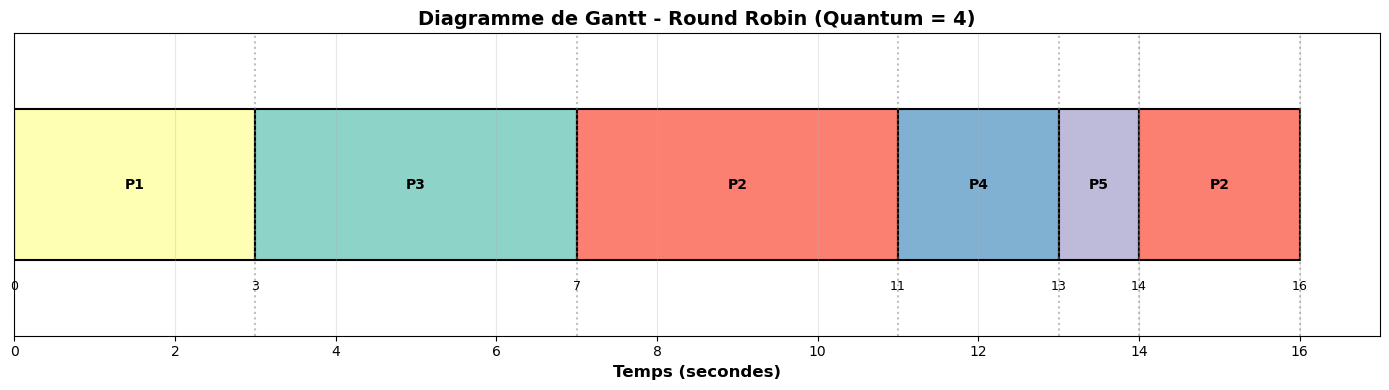


                                Round Robin (Quantum = 4)                                 
Processus Arrivée Exécution  Fin Séjour Attente Réponse
       P1     0.0       3.0  3.0    3.0     0.0     0.0
       P3     1.0       4.0  7.0    6.0     2.0     2.0
       P2     4.0       6.0 16.0   12.0     6.0     3.0
       P4     6.0       2.0 13.0    7.0     5.0     5.0
       P5     7.0       1.0 14.0    7.0     6.0     6.0
  Temps d'attente moyen : 3.80s
  Temps de réponse moyen: 3.20s
  Temps de séjour moyen : 7.00s



In [8]:
# Cellule 9 : TESTER UN SEUL ALGORITHME

# Choisissez l'algorithme à tester (décommentez une ligne)

# Option 1 : FCFS
#resultats, gantt = fcfs_simple(mes_processus)
#titre = "FCFS (First Come First Served)"

#Option 2 : Round Robin (décommentez les 3 lignes ci-dessous)
quantum = 4  # Modifiez le quantum ici
resultats, gantt = round_robin(mes_processus, quantum)
titre = f"Round Robin (Quantum = {quantum})"

# Option 3 : SJF (décommentez les 2 lignes ci-dessous)
# resultats, gantt = sjf_non_preemptif(mes_processus)
# titre = "SJF (Shortest Job First)"

# Option 4 : SRT (décommentez les 2 lignes ci-dessous)
# resultats, gantt = srt_preemptif(mes_processus)
# titre = "SRT (Shortest Remaining Time)"

# Afficher les résultats
print(f"\n🎯 Algorithme : {titre}\n")
afficher_gantt(gantt, titre)
stats = afficher_tableau(resultats, titre)


                COMPARAISON DE TOUS LES ALGORITHMES

Exécution des algorithmes...

1. FCFS (First Come First Served)


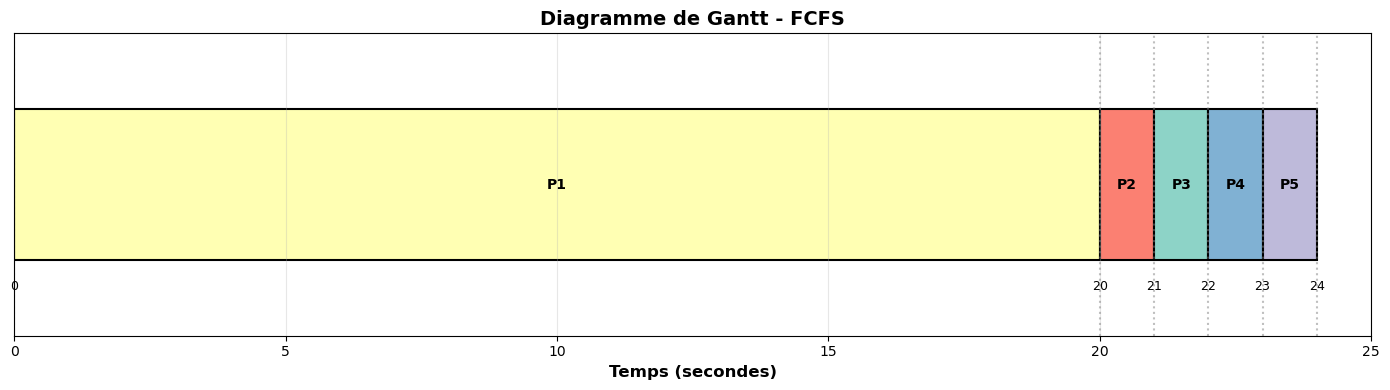


                                           FCFS                                           
Processus Arrivée Exécution  Fin Séjour Attente Réponse
       P1     0.0      20.0 20.0   20.0     0.0     0.0
       P2     1.0       1.0 21.0   20.0    19.0    19.0
       P3     2.0       1.0 22.0   20.0    19.0    19.0
       P4     3.0       1.0 23.0   20.0    19.0    19.0
       P5     4.0       1.0 24.0   20.0    19.0    19.0
  Temps d'attente moyen : 15.20s
  Temps de réponse moyen: 15.20s
  Temps de séjour moyen : 20.00s


2. Round Robin (Quantum = 2)


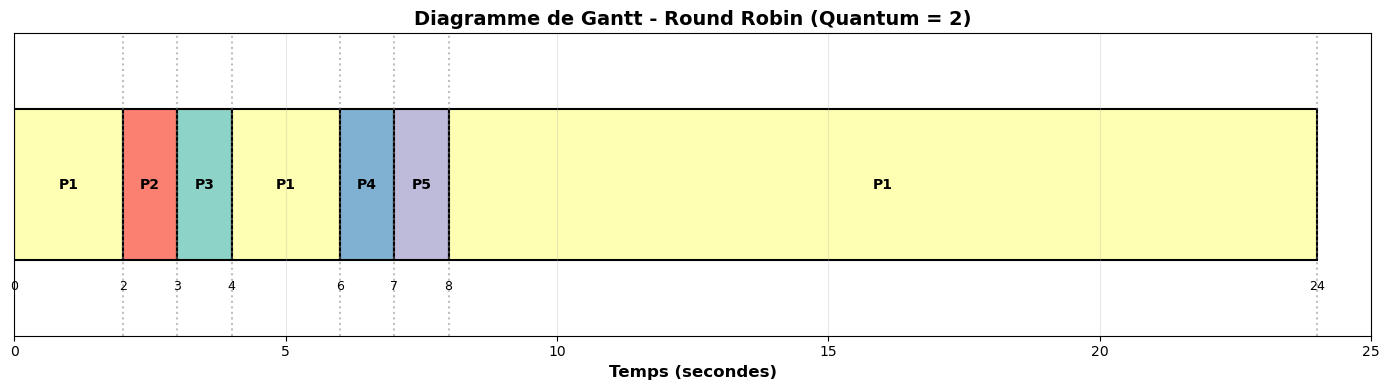


                                Round Robin (Quantum = 2)                                 
Processus Arrivée Exécution  Fin Séjour Attente Réponse
       P1     0.0      20.0 24.0   24.0     4.0     0.0
       P2     1.0       1.0  3.0    2.0     1.0     1.0
       P3     2.0       1.0  4.0    2.0     1.0     1.0
       P4     3.0       1.0  7.0    4.0     3.0     3.0
       P5     4.0       1.0  8.0    4.0     3.0     3.0
  Temps d'attente moyen : 2.40s
  Temps de réponse moyen: 1.60s
  Temps de séjour moyen : 7.20s


3. SJF (Shortest Job First)


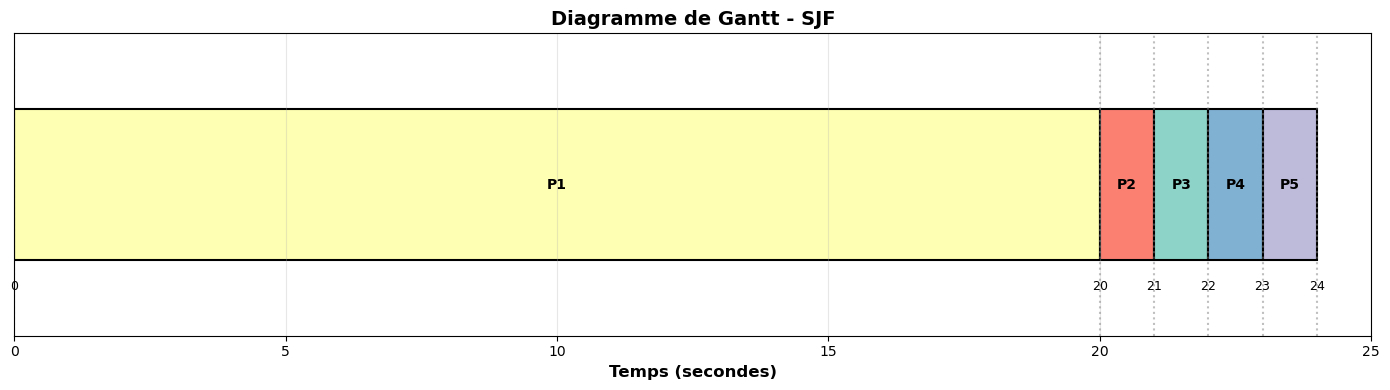


                                           SJF                                            
Processus Arrivée Exécution  Fin Séjour Attente Réponse
       P1     0.0      20.0 20.0   20.0     0.0     0.0
       P2     1.0       1.0 21.0   20.0    19.0    19.0
       P3     2.0       1.0 22.0   20.0    19.0    19.0
       P4     3.0       1.0 23.0   20.0    19.0    19.0
       P5     4.0       1.0 24.0   20.0    19.0    19.0
  Temps d'attente moyen : 15.20s
  Temps de réponse moyen: 15.20s
  Temps de séjour moyen : 20.00s


4. SRT (Shortest Remaining Time)


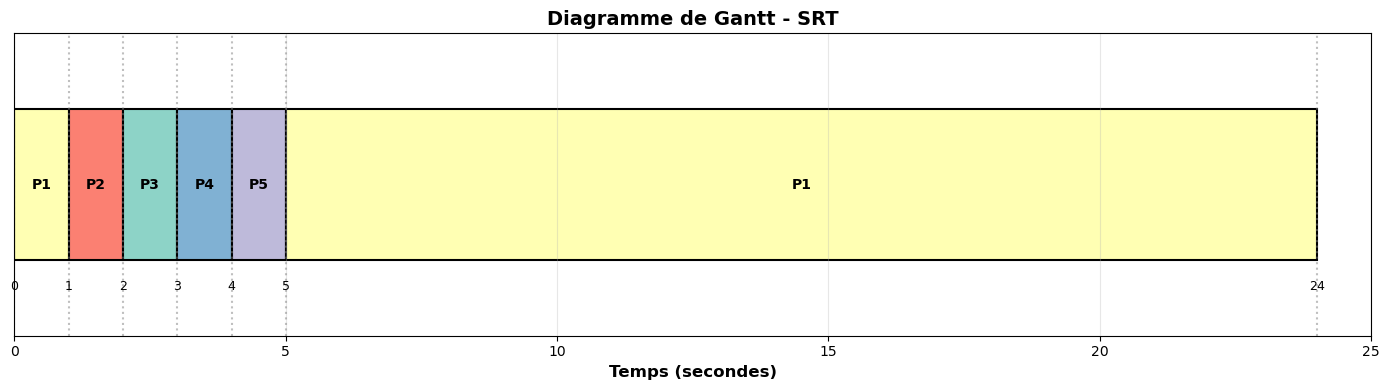


                                           SRT                                            
Processus Arrivée Exécution  Fin Séjour Attente Réponse
       P1     0.0      20.0 24.0   24.0     4.0     0.0
       P2     1.0       1.0  2.0    1.0     0.0     0.0
       P3     2.0       1.0  3.0    1.0     0.0     0.0
       P4     3.0       1.0  4.0    1.0     0.0     0.0
       P5     4.0       1.0  5.0    1.0     0.0     0.0
  Temps d'attente moyen : 0.80s
  Temps de réponse moyen: 0.00s
  Temps de séjour moyen : 5.60s



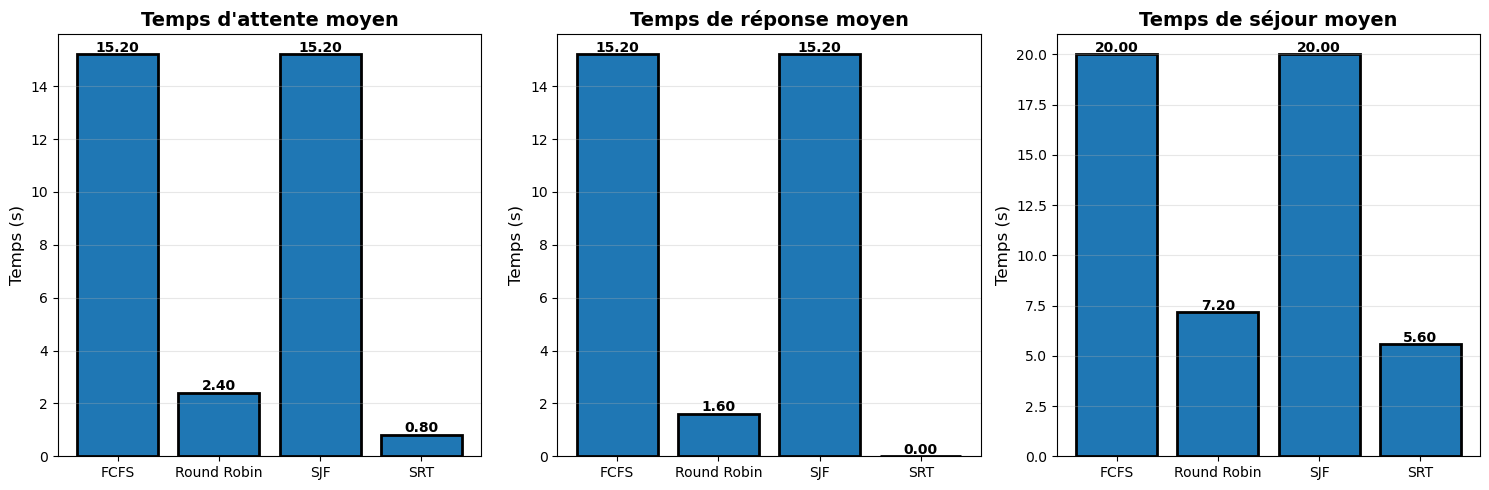


                  MEILLEURS ALGORITHMES
Meilleur temps d'attente : SRT (0.80s)
Meilleur temps de réponse : SRT (0.00s)
Meilleur temps de séjour  : SRT (5.60s)



In [17]:
# Cellule 10 : COMPARER TOUS LES ALGORITHMES

print("\n" + "="*60)
print("                COMPARAISON DE TOUS LES ALGORITHMES")
print("="*60 + "\n")

# Quantum pour Round Robin
quantum = 2

# Exécuter tous les algorithmes
print("Exécution des algorithmes...")
r_fcfs, g_fcfs = fcfs_simple(mes_processus)
r_rr, g_rr = round_robin(mes_processus, quantum)
r_sjf, g_sjf = sjf_non_preemptif(mes_processus)
r_srt, g_srt = srt_preemptif(mes_processus)

# FCFS
print("\n" + "="*90)
print("1. FCFS (First Come First Served)")
print("="*90)
afficher_gantt(g_fcfs, "FCFS")
s_fcfs = afficher_tableau(r_fcfs, "FCFS")

# Round Robin
print("\n" + "="*90)
print(f"2. Round Robin (Quantum = {quantum})")
print("="*90)
afficher_gantt(g_rr, f"Round Robin (Quantum = {quantum})")
s_rr = afficher_tableau(r_rr, f"Round Robin (Quantum = {quantum})")

# SJF
print("\n" + "="*90)
print("3. SJF (Shortest Job First)")
print("="*90)
afficher_gantt(g_sjf, "SJF")
s_sjf = afficher_tableau(r_sjf, "SJF")

# SRT
print("\n" + "="*90)
print("4. SRT (Shortest Remaining Time)")
print("="*90)
afficher_gantt(g_srt, "SRT")
s_srt = afficher_tableau(r_srt, "SRT")

# Comparaison graphique
stats_all = [
    ('FCFS', s_fcfs),
    ('Round Robin', s_rr),
    ('SJF', s_sjf),
    ('SRT', s_srt)
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
algos = [s[0] for s in stats_all]
attentes = [s[1]['attente'] for s in stats_all]
reponses = [s[1]['reponse'] for s in stats_all]
sejours = [s[1]['sejour'] for s in stats_all]

axes[0].bar(algos, attentes, edgecolor='black', linewidth=2)
axes[0].set_title("Temps d'attente moyen", fontweight='bold', fontsize=14)
axes[0].set_ylabel("Temps (s)", fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(attentes):
    axes[0].text(i, v + 0.1, f"{v:.2f}", ha='center', fontweight='bold')

axes[1].bar(algos, reponses, edgecolor='black', linewidth=2)
axes[1].set_title("Temps de réponse moyen", fontweight='bold', fontsize=14)
axes[1].set_ylabel("Temps (s)", fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(reponses):
    axes[1].text(i, v + 0.1, f"{v:.2f}", ha='center', fontweight='bold')

axes[2].bar(algos, sejours, edgecolor='black', linewidth=2)
axes[2].set_title("Temps de séjour moyen", fontweight='bold', fontsize=14)
axes[2].set_ylabel("Temps (s)", fontsize=12)
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(sejours):
    axes[2].text(i, v + 0.1, f"{v:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Meilleurs algorithmes
meilleur_attente = min(stats_all, key=lambda x: x[1]['attente'])
meilleur_reponse = min(stats_all, key=lambda x: x[1]['reponse'])
meilleur_sejour = min(stats_all, key=lambda x: x[1]['sejour'])

print("\n" + "="*60)
print("                  MEILLEURS ALGORITHMES")
print("="*60)
print(f"Meilleur temps d'attente : {meilleur_attente[0]} ({meilleur_attente[1]['attente']:.2f}s)")
print(f"Meilleur temps de réponse : {meilleur_reponse[0]} ({meilleur_reponse[1]['reponse']:.2f}s)")
print(f"Meilleur temps de séjour  : {meilleur_sejour[0]} ({meilleur_sejour[1]['sejour']:.2f}s)")
print("="*60 + "\n")
